In [6]:
import os
import numpy as np
import pandas as pd
import h5py
import pylab as P

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
# Set main model directory to parent directory
model_dir = os.path.dirname(os.getcwd()) 

In [8]:
# Read DaySim Results
ds = h5py.File(model_dir + r'/outputs/daysim_outputs.h5','r+')
ds_name = 'Model: 2040'

In [9]:
# Read Survey Results
survey_file = r'/inputs/hh_and_persons.h5'

sv = h5py.File(model_dir + survey_file ,'r+')
sv_name = '2006 Survey'

In [10]:
# Summarize Person-level results

# Age distribution
ages_ds = np.asarray(ds['Person']['pagey'])
ages_sv = np.asarray(sv['Person']['pagey'])

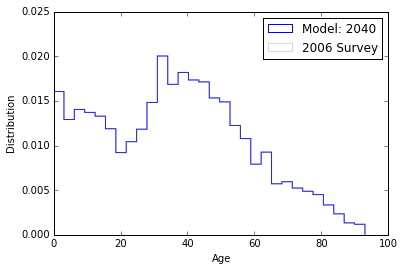

In [11]:
# Age Distribution Histogram
bins = 30

# Set model results to boldest (alpha default to 1)
P.hist(ages_ds, bins=bins, normed=True, histtype='step', color='b', label=ds_name)

# Compare with survey estimates (alpha < 0.5); Currently using fake data...
P.hist(ages_sv, bins=bins, normed=True, histtype='step', color='grey', alpha=0.3, label=sv_name)
P.xlabel('Age')
P.ylabel('Distribution')
P.legend()

In [12]:
print "Gender split (1 = female)"
print ""
print "Model results: " + str((np.asarray(ds['Person']['pgend']).mean()-1).round(3))
print sv_name + " results: " + str((np.asarray(sv['Person']['pgend']).mean()-1).round(3))

Gender split (1 = female)

Model results: 0.504
2006 Survey results: 0.504


In [13]:
# Worker type
worker_type_ds = np.asarray(ds['Person']['pptyp'])
worker_type_sv = np.asarray(sv['Person']['pptyp'])

(1, 8)

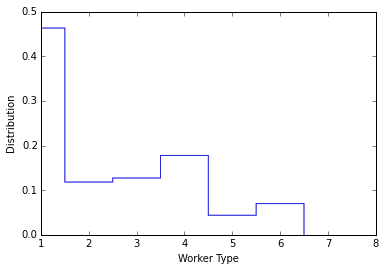

In [14]:
# Worker Type Histogram
numbins = 8
bins = np.arange(numbins)-0.5    # This center the historgram columns and splits by numbins

# Set model results to boldest (alpha default to 1)
P.hist(worker_type_ds, bins=bins, normed=True, histtype='step', color='b', label=ds_name)

# Compare with survey estimates (alpha < 0.5); Currently using fake data...
P.hist(worker_type_sv, bins=bins, normed=True, histtype='step', color='grey', alpha=0.3, label=sv_name)

#Labels
labels = {
  1: "Full time worker",
  2: "Part time worker",
  3: "Non working adult age 65+",
  4: "Non working adult age<65",
  5: "University student",
  6: "High school student age 16+",
  7: "Child age 5-15",
  8: "Child age 0-4"
}

P.xlabel('Worker Type')
P.ylabel('Distribution')
P.xlim(1, numbins)    # Set min and max for x axis
#P.xticks(xrange(len(labels)), [labels[i] for i in xrange(labels.keys()[0], len(labels)+1)], rotation=90)

In [ ]:
# Student type

In [ ]:
# Transit Pass

In [ ]:
# Paid parking